In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
matplotlib.style.use('bmh')

import seaborn as sns

import os

In [2]:
df = pd.read_csv('C:\\Users\\Trey\\Desktop\\Capstone II\\Data\\winemag-data-130k-v2.csv')
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
def nan_col_total(df):
    return (df.isna().sum() / len(df)) * 100

In [4]:
 # not sure how to display totals for each column on graph
def plot_nan_cols(df):
    nan_df = df[df.columns[df.isna().any()]]
    nan_data = nan_df.isna().sum() # create a series
    nan_data.plot(kind='bar',
                  title='Count of Nan Values',
                  xlabel='Column Name',
                  ylabel='Count',
                  figsize=(8,5), # https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
                  style='bmh'); # https://matplotlib.org/stable/gallery/color/named_colors.html 

In [5]:
def create_nan_df(column):
    return df.loc[df[column].isna() == True]

In [6]:
nan_col_total(df)

Unnamed: 0                0.000000
country                   0.048472
description               0.000000
designation              28.825661
points                    0.000000
price                     6.921544
province                  0.048472
region_1                 16.347493
region_2                 61.136715
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64

### Dealing with NaN Values

#### 1) NaN Country

In [7]:
nan_country = df.loc[df['country'].isna() == True]
nan_country

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


Unnamed: 0                 0.000000
country                  100.000000
description                0.000000
designation               17.460317
points                     0.000000
price                      6.349206
province                 100.000000
region_1                 100.000000
region_2                 100.000000
taster_name                0.000000
taster_twitter_handle      0.000000
title                      0.000000
variety                    0.000000
winery                     0.000000
dtype: float64

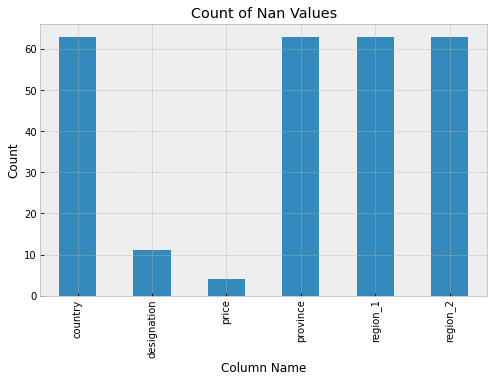

In [8]:
# here we see that for all nan country values province, region_1 and region_2 are missing so we will drop them all
plot_nan_cols(nan_country)
nan_col_total(nan_country)

In [9]:
df = df.loc[df['country'].isna() == False]

#### 2) Designation

In [10]:
# what can I do here? dummy vairable? can I leave it?
nan_designation = df.loc[df['designation'].isna() == True]
nan_designation

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
11,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,129952,US,This Zinfandel from the eastern section of Nap...,NaN,90,22.0,California,Chiles Valley,Napa,Virginie Boone,@vboone,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Houdini
129955,129955,New Zealand,"Like Dog Point's 2011 Chardonnay, this wine is...",NaN,90,40.0,Marlborough,NaN,NaN,Joe Czerwinski,@JoeCz,Dog Point 2012 Chardonnay (Marlborough),Chardonnay,Dog Point
129961,129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation


In [11]:
df['designation'].nunique()

37954

#### 3) Price

In [12]:
# for now i'll impute the mean price since it is only for ~ 6% of values
df['price'].fillna(value=round(df['price'].mean()), inplace=True)
nan_col_total(df)

C:\Users\Trey\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unnamed: 0                0.000000
country                   0.000000
description               0.000000
designation              28.831173
points                    0.000000
price                     0.000000
province                  0.000000
region_1                 16.306925
region_2                 61.117868
taster_name              20.201989
taster_twitter_handle    24.027004
title                     0.000000
variety                   0.000770
winery                    0.000000
dtype: float64

#### 4) region_1

Unnamed: 0                 0.000000
country                    0.000000
description                0.000000
designation               17.777568
points                     0.000000
price                      0.000000
province                   0.000000
region_1                 100.000000
region_2                 100.000000
taster_name                1.732440
taster_twitter_handle     11.083837
title                      0.000000
variety                    0.004721
winery                     0.000000
dtype: float64

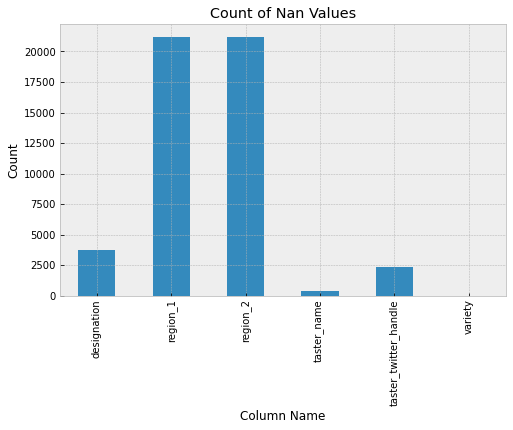

In [13]:
# region_2 is missing for every region_1
# how to deal with categorical variables???
nan_region_1 = create_nan_df('region_1')
plot_nan_cols(nan_region_1)
nan_col_total(nan_region_1)

In [14]:
nan_region_1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
15,15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
36,36,Chile,"White flower, lychee and apple aromas carry th...",Estate,86,15.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Estampa 2011 Estate Viognier-Chardonnay (Colch...,Viognier-Chardonnay,Estampa
44,44,Chile,A berry aroma comes with cola and herb notes. ...,NaN,86,9.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Sundance 2011 Merlot (Maule Valley),Merlot,Sundance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129956,129956,New Zealand,"The blend is 44% Merlot, 33% Cabernet Sauvigno...",Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec,90,19.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Esk Valley 2011 Gimblett Gravels Merlot-Cabern...,Bordeaux-style Red Blend,Esk Valley
129958,129958,New Zealand,This blend of Cabernet Sauvignon-Merlot and Ca...,Irongate,90,35.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Babich 2010 Irongate Red (Hawke's Bay),Bordeaux-style Red Blend,Babich
129960,129960,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,48.0,Douro,NaN,NaN,Roger Voss,@vossroger,Caves Transmontanas 2006 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas
129963,129963,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,20.0,Galilee,NaN,NaN,Mike DeSimone,@worldwineguys,Dalton 2012 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton


#### 4) region_2

In [15]:
print('Unique values for region_1: ' + str(df['region_1'].nunique()))
print('Unique values for region_2: ' + str(df['region_2'].nunique()))

Unique values for region_1: 1229
Unique values for region_2: 17


In [16]:
region_1_list = list((df['region_1'].unique()))
region_2_list = list((df['region_2'].unique()))

dupe_count = 0
for region in region_2_list:
    if region in region_1_list:
        dupe_count = dupe_count + 1
print(str(dupe_count) + ' out of 17 are in region_1')

16 out of 17 are in region_1


In [17]:
# since all but one value are the same as in region_1 and over 60% are missing we will drop the column
df.drop(columns='region_2', inplace=True)

C:\Users\Trey\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### 5) taster_name 

Unnamed: 0                 0.000000
country                    0.000000
description                0.000000
designation               33.257125
points                     0.000000
price                      0.000000
province                   0.000000
region_1                   1.398415
taster_name              100.000000
taster_twitter_handle    100.000000
title                      0.000000
variety                    0.003810
winery                     0.000000
dtype: float64

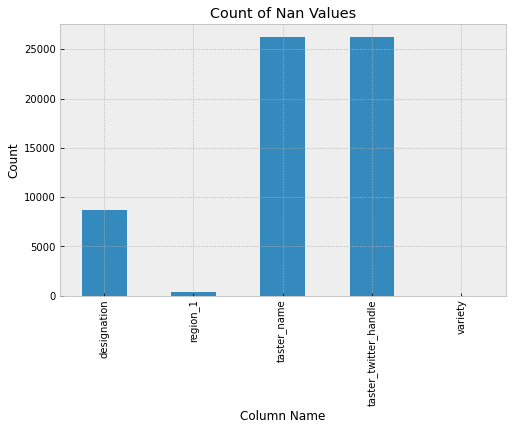

In [18]:
# if the taster name is missing so is the handle
nan_taster_name = create_nan_df('taster_name')
plot_nan_cols(nan_taster_name)
nan_col_total(nan_taster_name)

#### 6) taster_twitter_handle

Unnamed: 0                 0.000000
country                    0.000000
description                0.000000
designation               31.477269
points                     0.000000
price                      0.000000
province                   0.000000
region_1                   7.522507
taster_name               84.080351
taster_twitter_handle    100.000000
title                      0.000000
variety                    0.003204
winery                     0.000000
dtype: float64

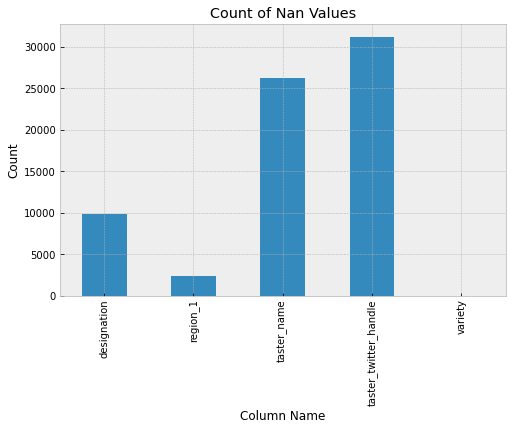

In [19]:
# the handle is equally unique as taster name, turn into a dummy variable? drop?
nan_twitter = create_nan_df('taster_twitter_handle')
plot_nan_cols(nan_twitter)
nan_col_total(nan_twitter)

#### 7) variety

Unnamed: 0                 0.0
country                    0.0
description                0.0
designation              100.0
points                     0.0
price                      0.0
province                   0.0
region_1                 100.0
taster_name              100.0
taster_twitter_handle    100.0
title                      0.0
variety                  100.0
winery                     0.0
dtype: float64

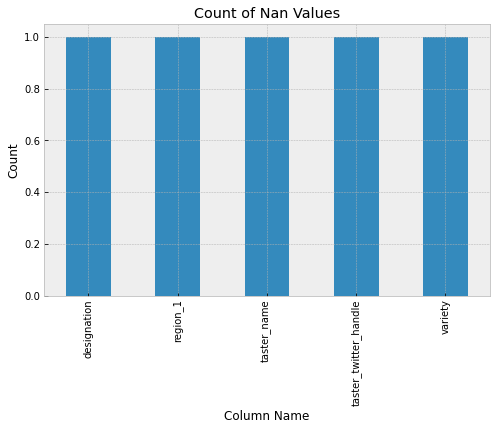

In [20]:
nan_variety = create_nan_df('variety')
plot_nan_cols(nan_variety)
nan_col_total(nan_variety)

In [21]:
nan_variety

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
86909,86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


In [22]:
df = df.loc[df['variety'].isna() == False]

#### Other

In [23]:
df.fillna({'region_1':'unknown', 'taster_name':'unknown', 'taster_twitter_handle': 'unknown', 'designation':'unknown'}, inplace=True)

In [24]:
# remove Unnamed: 0
df.drop(columns='Unnamed: 0', inplace=True)

In [25]:
df.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [26]:
nan_col_total(df)

country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64

### Export

In [27]:
df.to_csv('C:\\Users\\Trey\\Desktop\\Capstone II\\Data\\winedata.csv', index=False)